In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
import requests
import re
from bs4 import BeautifulSoup

In [3]:
URL = "https://en.wikipedia.org/wiki/Web_mining"
page=requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
f=open('web1.txt','w')
f.write(soup.text)
f.close

<function TextIOWrapper.close()>

In [4]:
f=open('web1.txt','r')
a=[]
for i in f:
    a.append(i)
f.close()

In [5]:
a=[i for i in a if i != '\n']
token=[]
for i in a:
    token.append(word_tokenize(i))
token

[['Web', 'mining', '-', 'Wikipedia'],
 ['document.documentElement.className=',
  "''",
  'client-js',
  "''",
  ';',
  'RLCONF=',
  '{',
  '``',
  'wgBreakFrames',
  "''",
  ':',
  '!',
  '1',
  ',',
  "''",
  'wgSeparatorTransformTable',
  "''",
  ':',
  '[',
  '``',
  "''",
  ',',
  "''",
  "''",
  ']',
  ',',
  "''",
  'wgDigitTransformTable',
  "''",
  ':',
  '[',
  '``',
  "''",
  ',',
  "''",
  "''",
  ']',
  ',',
  "''",
  'wgDefaultDateFormat',
  "''",
  ':',
  "''",
  'dmy',
  "''",
  ',',
  "''",
  'wgMonthNames',
  "''",
  ':',
  '[',
  '``',
  "''",
  ',',
  "''",
  'January',
  "''",
  ',',
  "''",
  'February',
  "''",
  ',',
  "''",
  'March',
  "''",
  ',',
  "''",
  'April',
  "''",
  ',',
  "''",
  'May',
  "''",
  ',',
  "''",
  'June',
  "''",
  ',',
  "''",
  'July',
  "''",
  ',',
  "''",
  'August',
  "''",
  ',',
  "''",
  'September',
  "''",
  ',',
  "''",
  'October',
  "''",
  ',',
  "''",
  'November',
  "''",
  ',',
  "''",
  'December',
  "''",
  ']',
  '

In [6]:
tokens=[]
for i in token:
    tokens.append([j for j in i if j.isalnum()])
    #for j in i:
     #   if not j.isalnum():
      #      i.remove(j)
tokens

[['Web', 'mining', 'Wikipedia'],
 ['wgBreakFrames',
  '1',
  'wgSeparatorTransformTable',
  'wgDigitTransformTable',
  'wgDefaultDateFormat',
  'dmy',
  'wgMonthNames',
  'January',
  'February',
  'March',
  'April',
  'May',
  'June',
  'July',
  'August',
  'September',
  'October',
  'November',
  'December',
  'wgRequestId',
  'wgCSPNonce',
  '1',
  'wgCanonicalNamespace',
  'wgCanonicalSpecialPageName',
  '1',
  'wgNamespaceNumber',
  'wgPageName',
  'wgTitle',
  'Web',
  'mining',
  'wgCurRevisionId',
  'wgRevisionId',
  'wgArticleId',
  'wgIsArticle',
  '0',
  'wgIsRedirect',
  '1',
  'wgAction',
  'view',
  'wgUserName',
  'null',
  'wgUserGroups',
  'wgCategories',
  'CS1',
  'errors',
  'missing',
  'periodical',
  'Articles',
  'needing',
  'cleanup',
  'from',
  'June',
  '2009',
  'All',
  'pages',
  'needing',
  'cleanup',
  'Cleanup',
  'tagged',
  'articles',
  'without',
  'a',
  'reason',
  'field',
  'from',
  'June',
  '2009',
  'Wikipedia',
  'pages',
  'needing',

In [7]:
stop_words=set(stopwords.words('english'))
a=['.',',','{','}','`','/','``',')','(','[',']',"''",';']
for i in a:
   stop_words.add(i)

In [8]:
f=[]
words=[]
s=[]
d={}
for i in tokens:
    f.append([w for w in i if not w in stop_words and w.isalpha()])
    s.append([w for w in i if w in stop_words and w.isalpha()])
    d[' '.join(i)]=[w for w in i if w in stop_words and w.isalpha()]
for i in f:
    for j in i:
        words.append(j.lower())
words=list(set(words))
words=[w for w in words if w.isalnum()]
d

{'Web mining Wikipedia': [],
 'wgBreakFrames 1 wgSeparatorTransformTable wgDigitTransformTable wgDefaultDateFormat dmy wgMonthNames January February March April May June July August September October November December wgRequestId wgCSPNonce 1 wgCanonicalNamespace wgCanonicalSpecialPageName 1 wgNamespaceNumber wgPageName wgTitle Web mining wgCurRevisionId wgRevisionId wgArticleId wgIsArticle 0 wgIsRedirect 1 wgAction view wgUserName null wgUserGroups wgCategories CS1 errors missing periodical Articles needing cleanup from June 2009 All pages needing cleanup Cleanup tagged articles without a reason field from June 2009 Wikipedia pages needing cleanup from June 2009 Articles to be expanded from June 2015 All articles to be expanded': ['from',
  'a',
  'from',
  'from',
  'to',
  'be',
  'from',
  'to',
  'be'],
 'Articles using small message boxes Articles lacking citations from September 2009 All articles lacking citations Web analytics Data mining World Wide Web wgPageContentLanguage en

In [9]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer() 
p=[]
l=[]
for w in words:
    p.append(ps.stem(w)) 
    l.append(lemmatizer.lemmatize(w))

In [10]:
import pandas as pd
data=pd.DataFrame(columns=['term', 'Stemmed Term', 'Lemmetized Word'])

In [11]:
data['term']=words
data['Stemmed Term']=p
data['Lemmetized Word']=l
data.head()

term Stemmed Term Lemmetized Word
0  organize        organ        organize
1    webkdd       webkdd          webkdd
2    reason       reason          reason
3    faster       faster          faster
4  increase      increas        increase

In [12]:
len(data)

1077

In [13]:
data.shape

(1077, 3)

In [14]:
sentence=[]
stop=[]
tags=[]
for key in d:
    s=list(set(d[key]))
    if(len(s)!=0):
        tag = nltk.pos_tag(s) 
        t=[]
        pos=[]
        for i in tag:
            t.append(i[0])
            pos.append(i[1])
        sentence.append(key)
        stop.append(' , '.join(t))
        tags.append(' , '.join(pos))

In [15]:
da=pd.DataFrame(columns=['sentence', 'Stop word', 'POS tag'])
da

Empty DataFrame
Columns: [sentence, Stop word, POS tag]
Index: []

In [63]:
da['sentence']=sentence
da['Stop word']=stop
da['POS tag']=tags
da

sentence  \
0   wgBreakFrames 1 wgSeparatorTransformTable wgDi...   
1   Articles using small message boxes Articles la...   
2                From Wikipedia the free encyclopedia   
3                                  Jump to navigation   
4                                      Jump to search   
..                                                ...   
87                   Download as PDFPrintable version   
88    This page was last edited on 1 July 2020 at UTC   
89  Text is available under the Creative Commons L...   
90  additional terms may apply By using this site ...   
91  context https type Article name Web mining url...   

                                    Stop word  \
0                          to , a , be , from   
1                                        from   
2                                         the   
3                                          to   
4                                          to   
..                                        ...   
87                                         as   
88                              at , on , was   
89                           under , the , is   
90  and , this , you , of , the , to , a , is   
91                                         to   

                                    POS tag  
0                         TO , DT , VB , IN  
1                                        IN  
2                                        DT  
3                                        TO  
4                                        TO  
..                                      ...  
87                                       IN  
88                            IN , IN , VBD  
89                            IN , DT , VBZ  
90  CC , DT , PRP , IN , DT , TO , DT , VBZ  
91                                       TO  

[92 rows x 3 columns]

In [17]:
URL = "https://en.wikipedia.org/wiki/Data_mining"
page=requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
fx=open('web2.txt','w')
fx.write(soup.text)
fx.close

<function TextIOWrapper.close()>

In [18]:
fx=open('web2.txt','r')
a=[]
for i in fx:
    a.append(i)
fx.close()

In [19]:
a=[i for i in a if i != '\n']
token=[]
for i in a:
    token.append(word_tokenize(i))
token

[['Data', 'mining', '-', 'Wikipedia'],
 ['document.documentElement.className=',
  "''",
  'client-js',
  "''",
  ';',
  'RLCONF=',
  '{',
  '``',
  'wgBreakFrames',
  "''",
  ':',
  '!',
  '1',
  ',',
  "''",
  'wgSeparatorTransformTable',
  "''",
  ':',
  '[',
  '``',
  "''",
  ',',
  "''",
  "''",
  ']',
  ',',
  "''",
  'wgDigitTransformTable',
  "''",
  ':',
  '[',
  '``',
  "''",
  ',',
  "''",
  "''",
  ']',
  ',',
  "''",
  'wgDefaultDateFormat',
  "''",
  ':',
  "''",
  'dmy',
  "''",
  ',',
  "''",
  'wgMonthNames',
  "''",
  ':',
  '[',
  '``',
  "''",
  ',',
  "''",
  'January',
  "''",
  ',',
  "''",
  'February',
  "''",
  ',',
  "''",
  'March',
  "''",
  ',',
  "''",
  'April',
  "''",
  ',',
  "''",
  'May',
  "''",
  ',',
  "''",
  'June',
  "''",
  ',',
  "''",
  'July',
  "''",
  ',',
  "''",
  'August',
  "''",
  ',',
  "''",
  'September',
  "''",
  ',',
  "''",
  'October',
  "''",
  ',',
  "''",
  'November',
  "''",
  ',',
  "''",
  'December',
  "''",
  ']',
  

In [20]:
tokens2=[]
for i in token:
    tokens2.append([j for j in i if j.isalnum()])
tokens2

[['Data', 'mining', 'Wikipedia'],
 ['wgBreakFrames',
  '1',
  'wgSeparatorTransformTable',
  'wgDigitTransformTable',
  'wgDefaultDateFormat',
  'dmy',
  'wgMonthNames',
  'January',
  'February',
  'March',
  'April',
  'May',
  'June',
  'July',
  'August',
  'September',
  'October',
  'November',
  'December',
  'wgRequestId',
  'wgCSPNonce',
  '1',
  'wgCanonicalNamespace',
  'wgCanonicalSpecialPageName',
  '1',
  'wgNamespaceNumber',
  'wgPageName',
  'wgTitle',
  'Data',
  'mining',
  'wgCurRevisionId',
  'wgRevisionId',
  'wgArticleId',
  'wgIsArticle',
  '0',
  'wgIsRedirect',
  '1',
  'wgAction',
  'view',
  'wgUserName',
  'null',
  'wgUserGroups',
  'wgCategories',
  'CS1',
  'maint',
  'multiple',
  'names',
  'authors',
  'list',
  'Webarchive',
  'template',
  'wayback',
  'links',
  'Articles',
  'to',
  'be',
  'expanded',
  'from',
  'September',
  '2011',
  'All',
  'articles',
  'with',
  'specifically',
  'marked',
  'phrases',
  'Articles',
  'with',
  'specifical

In [21]:
f1=[]
for i in tokens2:
    f1.append([w for w in i if not w in stop_words and w.isalpha()])
f_f=[]
f_f1=[]
for i in f:
    for j in i:
        f_f.append(j.lower())
for i in f1:
    for j in i:
        f_f1.append(j.lower())
f=list(set(f_f))
f1=list(set(f_f1))

In [44]:
d={}
d1={}
for i in f:
    c=0
    for j in f_f:
        if(i==j):
            c+=1
    d[i]=c
for i in f1:
    c=0
    for j in f_f1:
        if(i==j):
            c+=1
    d1[i]=c
d['organize']

1

In [40]:
bag=pd.DataFrame()
bag

Empty DataFrame
Columns: []
Index: []

In [45]:
bag['DOC']=['doc1','doc2']
fx=f+f1
for i in fx:
    if i in f and i in f1:
        bag[i]=[d[i],d1[i]]
    elif i in f1 and not i in f:
        bag[i]=[0,d1[i]]
    else:
        bag[i]=[d[i],0]
bag.head()

DOC  organize  webkdd  reason  faster  increase  vector  databases  mason  \
0  doc1         1       1       3       1         1       2          1      1   
1  doc2         0       0       0       0         0       4          6      0   

   pagecontentscurrent  ...  ferpa  bayes  editing  grants  fully  reutemann  \
0                    1  ...      0      0        0       0      0          0   
1                    1  ...      1      3        1       1      1          1   

   masquerades  violation  annual  comes  
0            0          0       0      0  
1            1          1       1      1  

[2 rows x 2254 columns]

In [46]:
boolean=pd.DataFrame()
boolean

Empty DataFrame
Columns: []
Index: []

In [47]:
a1=[]
a2=[]
a3=[]
a=f_f+f_f1
a=list(set(a))
for i in a:
    if i in f_f1 and i in f_f:
        a1.append(i)
        a2.append(1)
        a3.append(1)
    elif i in f_f1 and not i in f_f:
        a1.append(i)
        a2.append(0)
        a3.append(1)
    else:
        a1.append(i)
        a2.append(1)
        a3.append(0) 
boolean['term']=a1
boolean['doc1']=a2
boolean['doc2']=a3
boolean.head()

term  doc1  doc2
0               reason     1     0
1               factor     0     1
2  pagecontentscurrent     1     1
3                smyth     0     1
4                brief     0     1

In [48]:
x=input(("Enter a query"))
x=x.split()
x

Enter a queryweb mining is a subset of data mining


['web', 'mining', 'is', 'a', 'subset', 'of', 'data', 'mining']

In [49]:
x=[w.lower() for w in x if not w in stop_words]
x

['web', 'mining', 'subset', 'data', 'mining']

In [50]:
i1=[]
i2=[]
for i in x:
    for j in boolean.iterrows():
        if j[1]['term'] == i:
            i1.append(j[1]['doc1'])
            i2.append(j[1]['doc2'])

In [53]:
print("Document 1:")
for i in x:
    print(bag[i][0])
print("Document 2:")
for i in x:
    print(bag[i][1])

Document 1:
128
94
1
62
94
Document 2:
6
165
0
260
165


In [54]:
from docx import Document
document = Document()
document.add_paragraph(' '.join(f_f))
document.save('web1.docx')

In [55]:
document1 = Document()
document1.add_paragraph(' '.join(f_f1))
document1.save('web2.docx')

In [56]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [57]:
x1=' '.join(f_f)
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='#d1bc36', 
                stopwords = stop_words, 
                min_font_size = 8).generate(x1) 

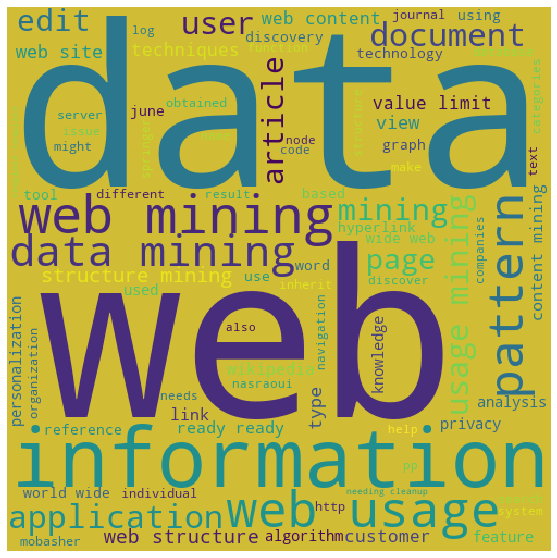

In [58]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show()

In [61]:
x2=' '.join(f_f1)
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='#8ae6df', 
                stopwords = stop_words, 
                min_font_size = 8).generate(x1) 

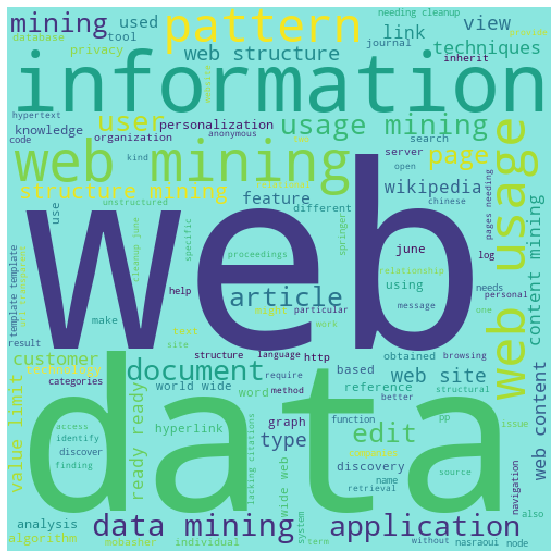

In [62]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show()